In [4]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [5]:
using DataFrames
using StatsPlots

In [6]:
using Revise
using Newtrinos
using Newtrinos.osc

In [7]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.1.9
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [8]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}(NNM(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#47"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [9]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec=Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [10]:
experiments = (
 
   minos= Newtrinos.minos.configure(physics),
);

[ Info: Loading minos data


In [11]:
p = Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.01, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

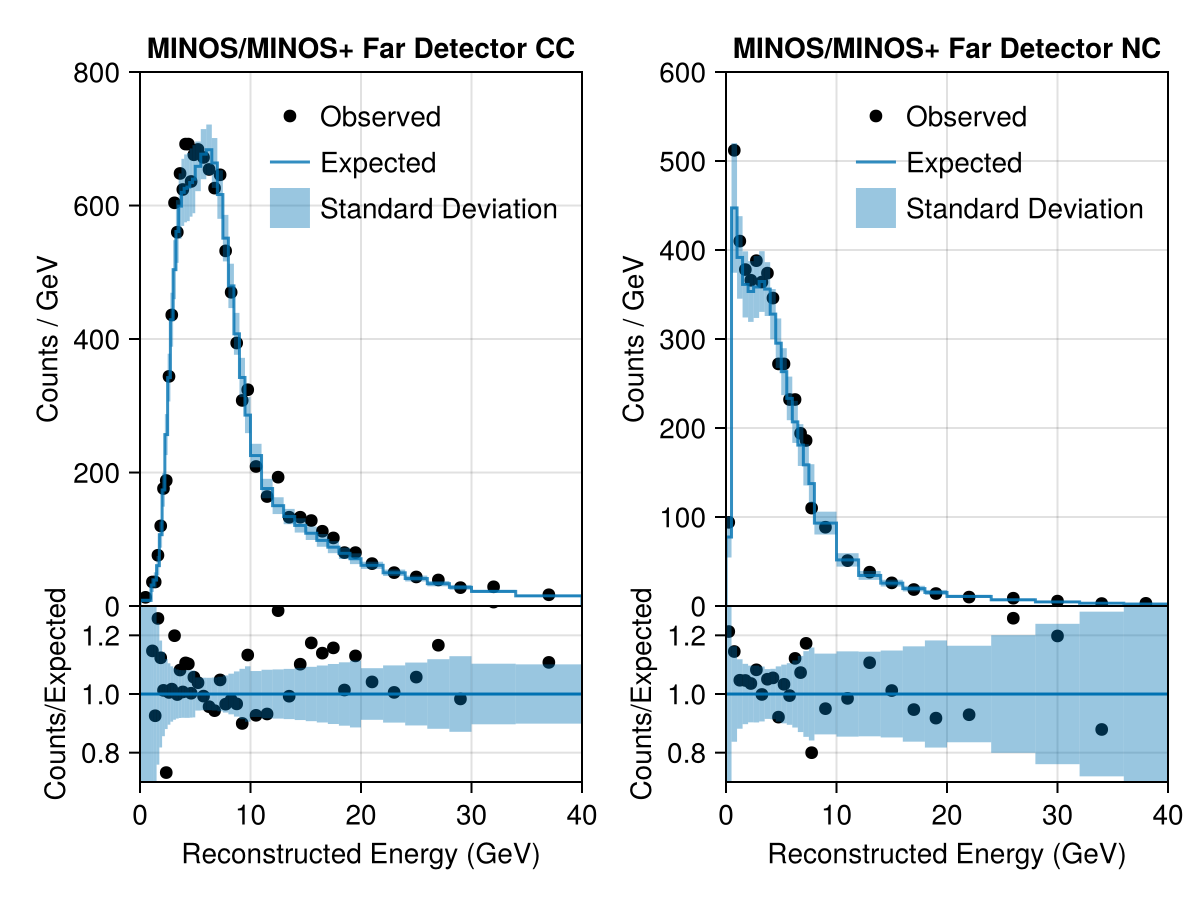

In [12]:
img = experiments.minos.plot(p)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/natural plot/minos/minos_data_NND_20.png", img)

In [13]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (θ₁₃=31, Δm²₃₁=31)  

modified_priors = (
    N = p.N, 
    m₀= p.m₀,
    r =p.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ = all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= all_priors.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = 20.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [14]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [15]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:55:48


NewtrinosResult((θ₁₃ = [0.1, 0.10333333333333333, 0.10666666666666667, 0.11000000000000001, 0.11333333333333334, 0.11666666666666667, 0.12000000000000001, 0.12333333333333334, 0.12666666666666668, 0.13  …  0.16999999999999998, 0.17333333333333334, 0.1766666666666667, 0.18000000000000002, 0.18333333333333335, 0.18666666666666668, 0.19, 0.19333333333333336, 0.19666666666666668, 0.2], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], m₀ = [0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01; … ; 0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01], nc_norm = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.

In [16]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [17]:
JLD2.@save "scan_minos_deltatheta_NNM.jld2" result

In [18]:
using CairoMakie

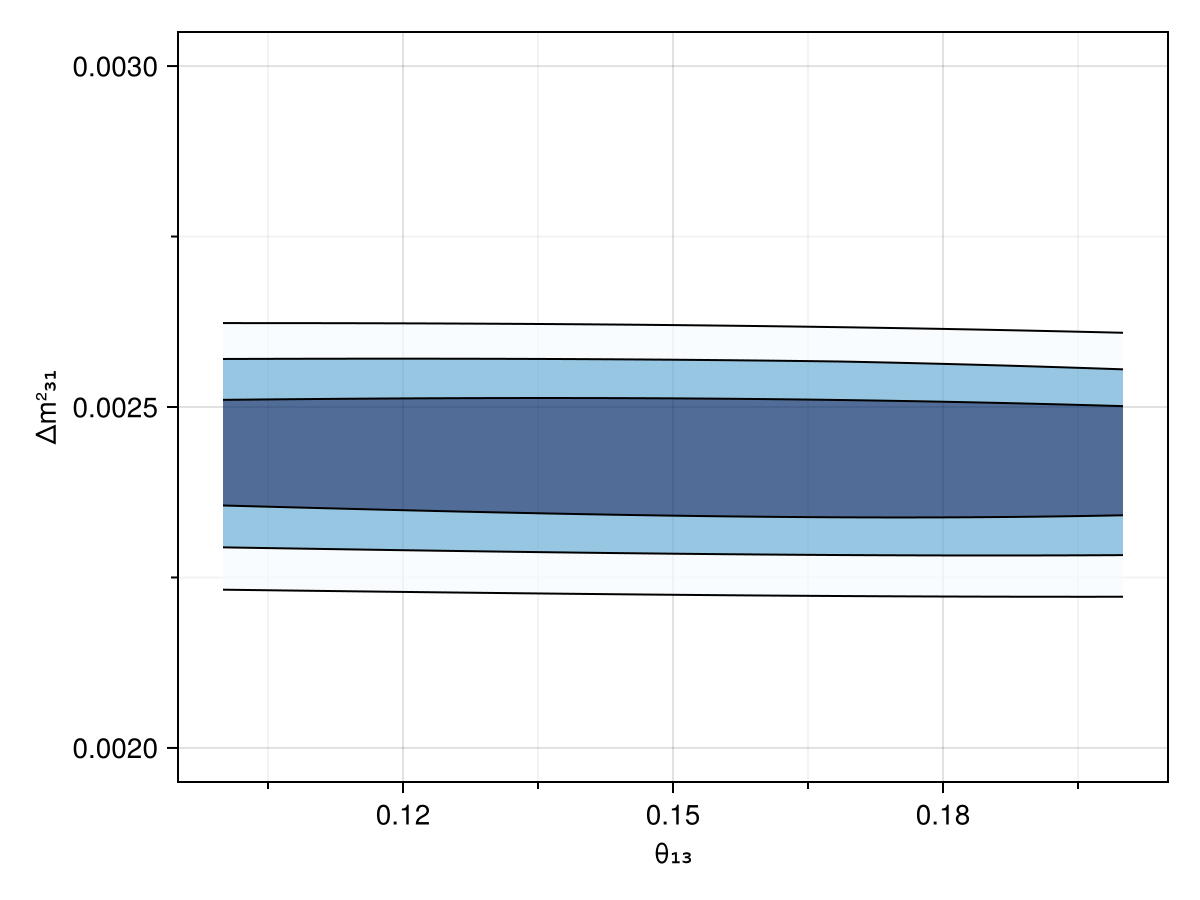

In [19]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/minos/minos_deltatheta_NNM.png", img)


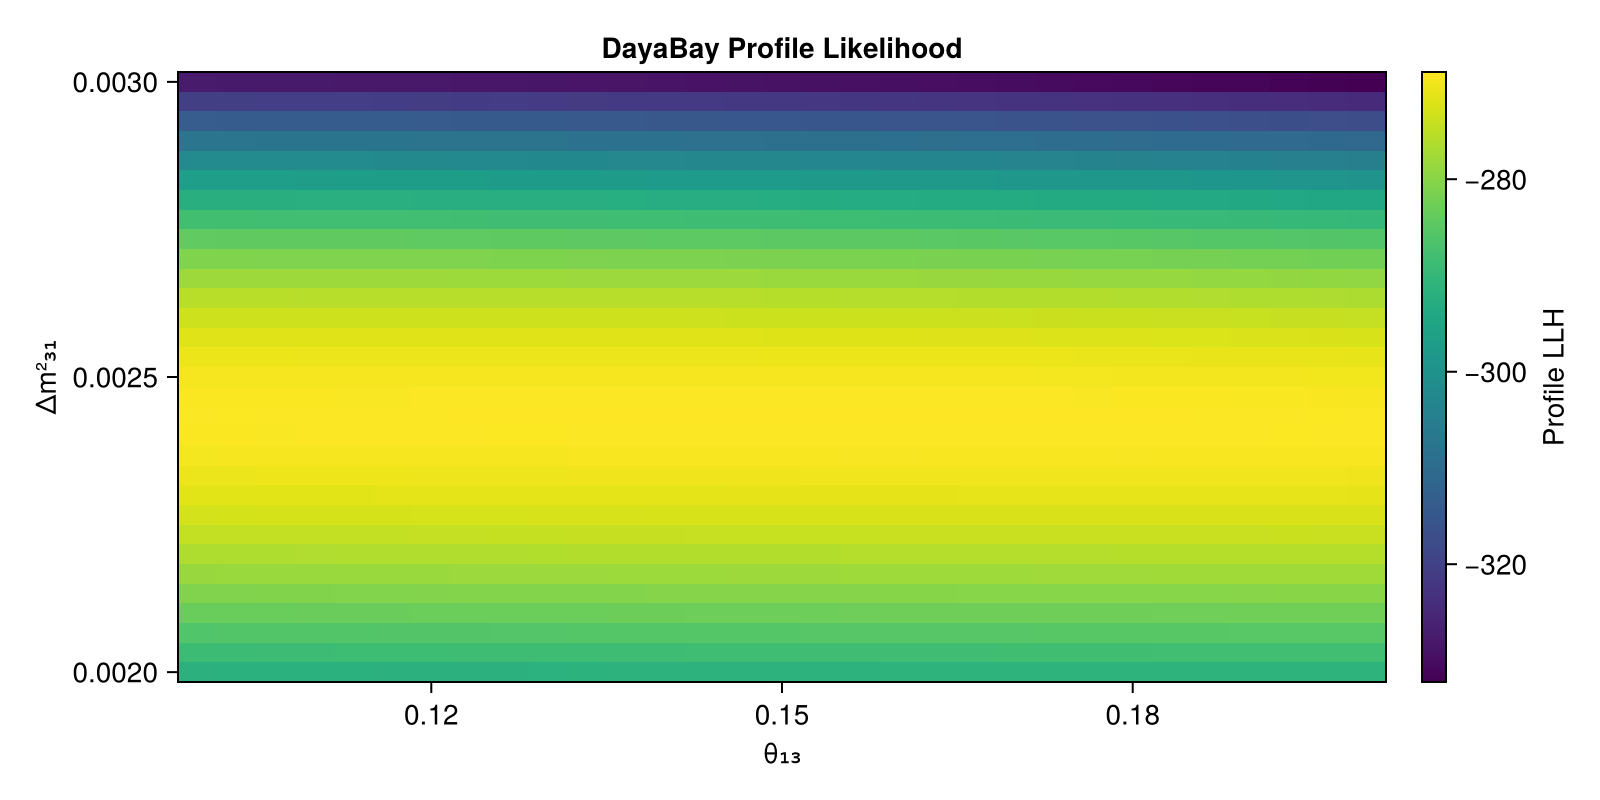

In [46]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_rN_NND_profthetadeltam_.png", fig)
fig

Likelihood ratio test


In [ ]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [20]:

# STANDARD MODEL
E_range = range(1, 14, length=1000) 
L=735
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec_SM = Newtrinos.xsec.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers, xsec);


experiments_SM = (
 
   minos = Newtrinos.minos.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading minos data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9489321604003039
 0.9466635149952564
 0.9444783922937747
 0.9423798860721937
 0.9403701870815699
 0.9384506970120305
 0.9366221315338682
 0.9348846131146719
 0.9332377543369073
 0.9316807324436446
 0.9302123558274096
 0.9288311231530293
 0.9275352757734635
 ⋮
 0.997765671262896
 0.9977698242739018
 0.9977739657522575
 0.9977780957404896
 0.9977822142809301
 0.9977863214157162
 0.9977904171867921
 0.9977945016359102
 0.997798574804632
 0.9978026367343295
 0.9978066874661843
 0.997810727041192

[:, :, 2, 1] =
 0.014903661873465961
 0.016009786956010803
 0.01710308865437157
 0.018179665071153834
 0.01923615202588561
 0.02026967649570886
 0.021277812217017356
 0.02225853769167289
 0.0232101967411453
 0.024131461673578637
 0.02502129906844023
 0.025878938137731747
 0.02670384158894576
 ⋮
 0.0013559408488081287
 0.0013534499688990492
 0.0013509659214577569
 0.0013484886816132323
 0.00134601822460705
 0.0013435545257927922
 0.0013410975606354574

In [21]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=false)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=false)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=false)
probab_50 = osc_prob(collect(E_range), L_vec, p_50;anti=false)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=false)
probab_025 = osc_prob(collect(E_range), L_vec, p_025;anti=false)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=false)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=false)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.9419522051459019
 0.9328559624940974
 0.9294756092347384
 0.9332491767372747
 0.9263880648512439
 0.9290010097727543
 0.9222905205526329
 0.9258436823778695
 0.9194532209102929
 0.9171088244118226
 0.9171231197731965
 0.9213329595876268
 0.921193151835705
 ⋮
 0.9918299079090881
 0.9886641074872351
 0.9863170742570866
 0.9901433916831831
 0.9920508346262845
 0.9904769391326648
 0.990676469605028
 0.9925458485123211
 0.992867235608372
 0.9924516092984916
 0.9904715017868295
 0.9907733192409919

[:, :, 2, 1] =
 0.03247110642982078
 0.03426202382507816
 0.035757109389989966
 0.037896770082587086
 0.03900493909443558
 0.040158203059537656
 0.041644321415561784
 0.043760904367193515
 0.044084564824224536
 0.045876921659119704
 0.04704349316798211
 0.04854183749102223
 0.04865763941011604
 ⋮
 0.0013506134051204273
 0.0014188332323042468
 0.001396682390174569
 0.001398530530472692
 0.001314293813270662
 0.0014101733094630344
 0.0014202341382142

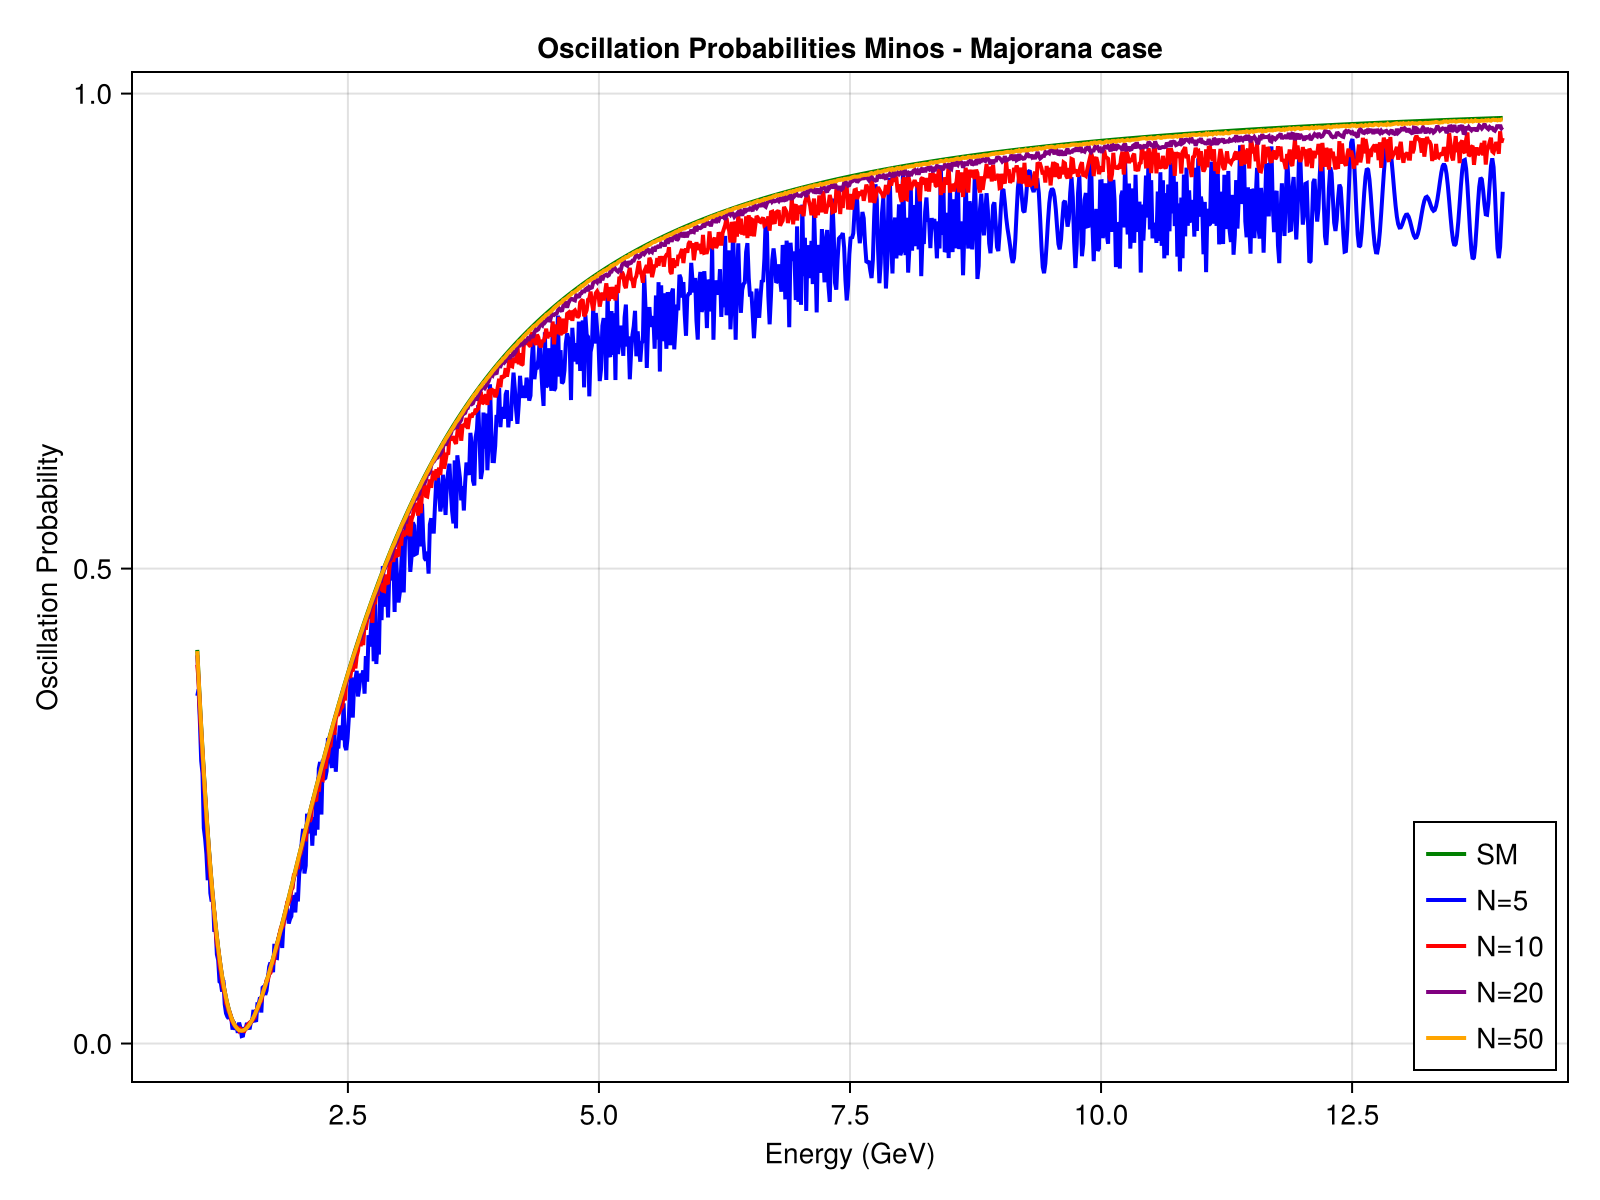

In [22]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Minos - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 2, 2], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 2, 2], label="N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 2, 2], label="N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 2, 2], label="N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 2, 2], label="N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/minos/osc_minos_N_majorana.png", fig)

fig

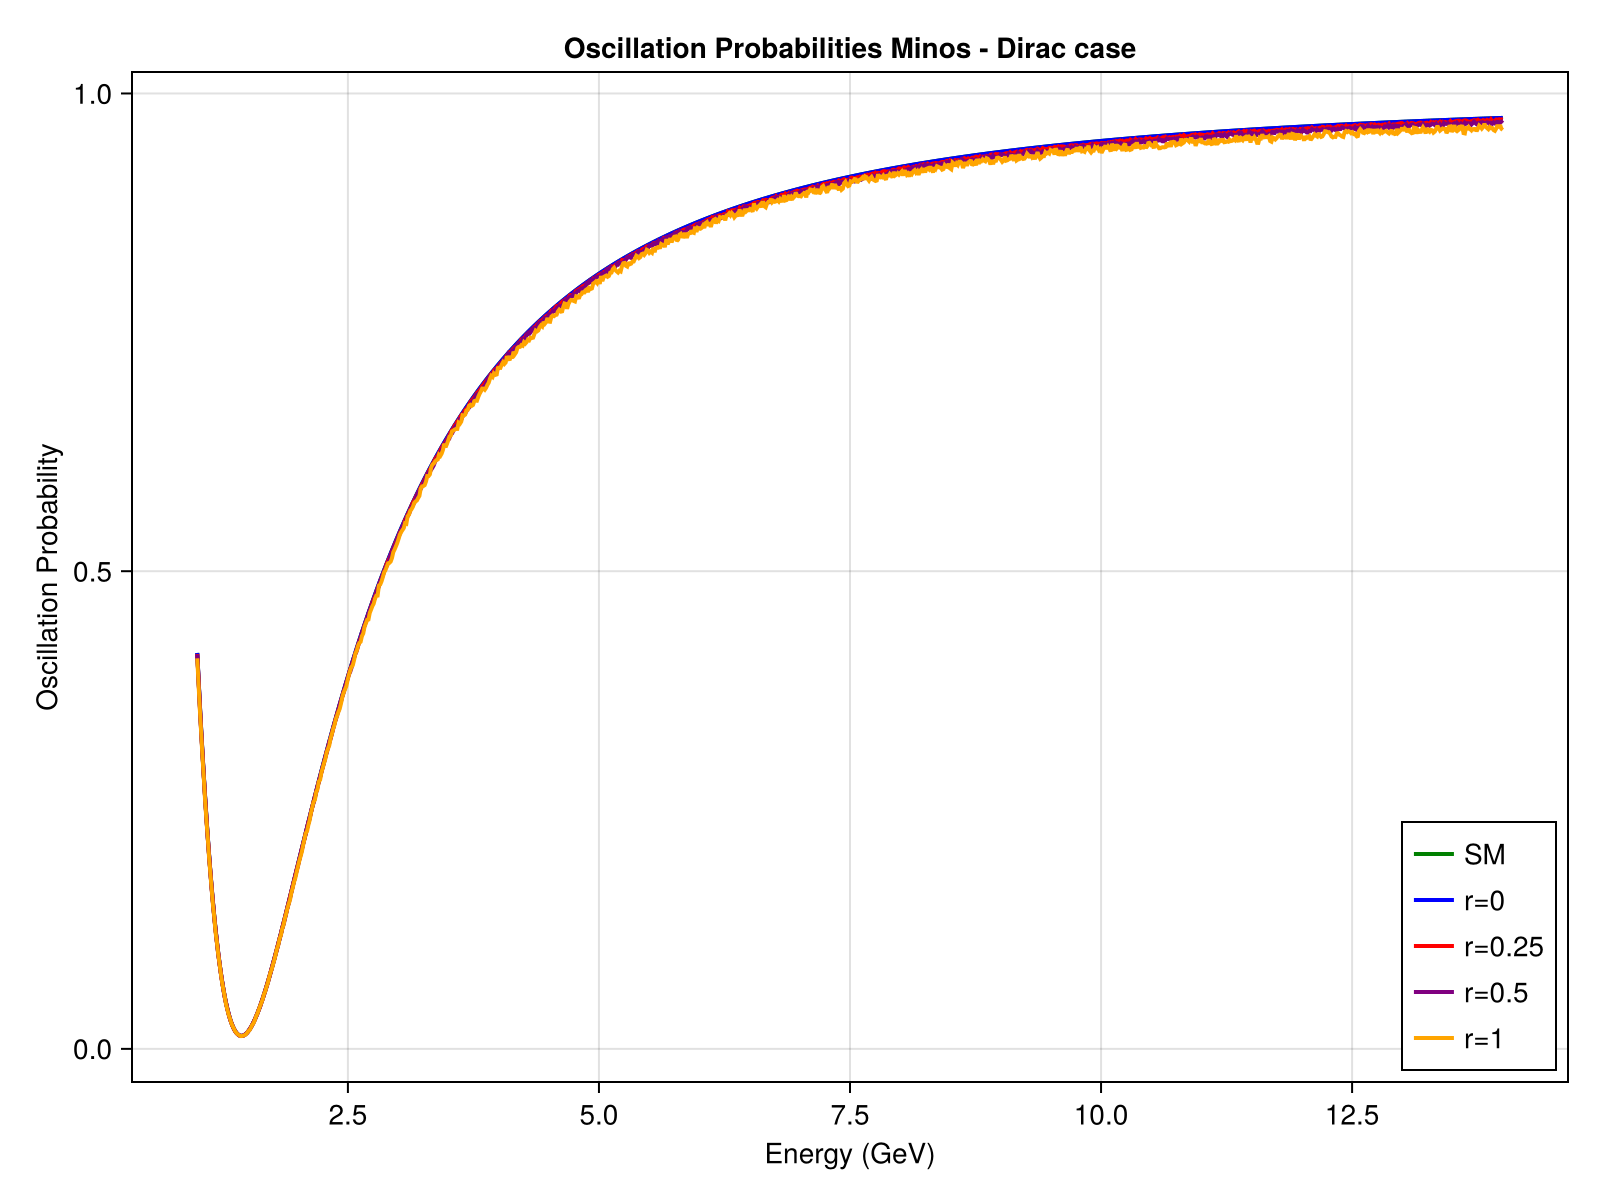

In [23]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Minos - Dirac case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1,  2 ,2 ], label="SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1,  2 ,2 ], label="r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1,  2 ,2 ], label="r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 2 ,2 ], label="r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 2 ,2 ], label="r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/minos/osc_minos_r_majorana.png", fig)

fig